In [2]:
#import the necessary libraries and load the datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
train = pd.read_csv('https://raw.githubusercontent.com/psabhay2003/Electrics-Range-Estimation-Model/refs/heads/main/Train.csv')
test = pd.read_csv('https://raw.githubusercontent.com/psabhay2003/Electrics-Range-Estimation-Model/refs/heads/main/Test.csv')

In [3]:
train.head()

,Unnamed: 0,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract,Electric_Range
0,0,5YJSA1DN0C,Thurston,Olympia,WA,98502.0,2012,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,59900.0,22.0,186637195,POINT (-122.92333 47.03779),PUGET SOUND ENERGY INC,5.306701e+10,265.0
1,1,WBY1Z6C30H,King,Bellevue,WA,98004.0,2017,BMW,I3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,0.0,48.0,196789610,POINT (-122.1872 47.61001),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10,81.0
2,2,WBY7Z6C52J,King,Kent,WA,98031.0,2018,BMW,I3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,0.0,11.0,221792728,POINT (-122.17743 47.41185),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10,114.0
3,3,WBY1Z2C58F,King,Woodinville,WA,98072.0,2015,BMW,I3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,0.0,45.0,135735155,POINT (-122.15545 47.75448),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10,81.0
4,4,5YJSA1E45G,Snohomish,Bothell,WA,98012.0,2016,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,0.0,1.0,477081811,POINT (-122.21061 47.83448),PUGET SOUND ENERGY INC,5.306105e+10,210.0


In [4]:
test.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract,Electric_Range
0,4JGDA6DB1H,Snohomish,Bothell,WA,98021,2017,MERCEDES-BENZ,GLE-CLASS,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,0,1,269583485,POINT (-122.18384 47.8031),PUGET SOUND ENERGY INC,53061051922,NaN
1,WVWKR7AU8K,King,Seattle,WA,98115,2019,VOLKSWAGEN,E-GOLF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,0,46,333067283,POINT (-122.31676 47.68156),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),53033004301,NaN
2,WVWPR7AU2K,King,Renton,WA,98059,2019,VOLKSWAGEN,E-GOLF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,0,5,8881806,POINT (-122.15734 47.48718),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),53033031904,NaN
3,1G1RD6S50H,Clark,Camas,WA,98607,2017,CHEVROLET,VOLT,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,0,18,104698345,POINT (-122.40199 45.58694),BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF C...,53011040605,NaN
4,1G1FZ6S00L,King,North Bend,WA,98045,2020,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,0,5,127301779,POINT (-121.7831 47.49348),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),53033032704,NaN


In [5]:
#data summary
train.info()
train.describe()
train.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9290 entries, 0 to 9289
Data columns (total 18 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Unnamed: 0                                         9290 non-null   int64  
 1   VIN (1-10)                                         9290 non-null   object 
 2   County                                             9290 non-null   object 
 3   City                                               9290 non-null   object 
 4   State                                              9290 non-null   object 
 5   Postal Code                                        9290 non-null   float64
 6   Model Year                                         9290 non-null   int64  
 7   Make                                               9290 non-null   object 
 8   Model                                              9290 non-null   object 
 9   Electric

,0
Unnamed: 0,0
VIN (1-10),0
County,0
City,0
State,0
Postal Code,0
Model Year,0
Make,0
Model,0
Electric Vehicle Type,0


In [6]:
#dropping irrelevant columns
columns_to_drop = ["County", "City", "State", "Postal Code", "Legislative District", "DOL Vehicle ID"]
train = train.drop(columns=columns_to_drop, axis=1)
print(train.columns)
test = test.drop(columns=columns_to_drop, axis=1)
print(test.columns)

Index(['Unnamed: 0', 'VIN (1-10)', 'Model Year', 'Make', 'Model',
       'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Base MSRP',
       'Vehicle Location', 'Electric Utility', '2020 Census Tract',
       'Electric_Range'],
      dtype='object')
Index(['VIN (1-10)', 'Model Year', 'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Base MSRP',
       'Vehicle Location', 'Electric Utility', '2020 Census Tract',
       'Electric_Range'],
      dtype='object')


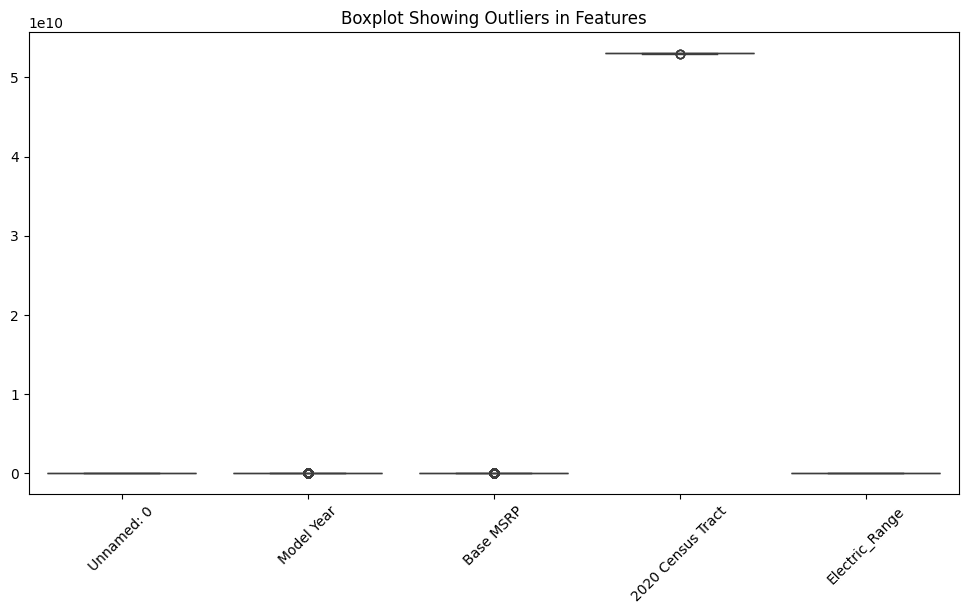

In [7]:
#Outlier Handeling and Normalisation
outlier_features = train.select_dtypes(include=np.number).columns
# Boxplot for Outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=train
 [outlier_features])
plt.title("Boxplot Showing Outliers in Features")
plt.xticks(rotation=45)
plt.show()
#this difference in 2020 Census Tract is because the features are not scaled

In [8]:
y_train = train["Electric_Range"] #y_train is target variable
X_train = train.drop(columns=["Electric_Range"])
X_test  = test.copy()
numeric_cols     = X_train.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = X_train.select_dtypes(include=["object", "bool", "category"]).columns.tolist()

from sklearn.preprocessing import LabelEncoder
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    X_train[col] = le.fit_transform(X_train[col])
    # map unseen categories in test to -1
    X_test[col] = X_test[col].map(lambda s: le.transform([s])[0] if s in le.classes_ else -1)
    label_encoders[col] = le

#1) Identify numeric columns (after encoding)
numeric_cols = X_train.select_dtypes(include=[np.number]).columns.tolist()

#2) Outlier capping on numeric cols (1st–99th percentile)
for col in ["Base MSRP", "Electric_Range"]:
    lower, upper = train[col].quantile([0.01, 0.99])
    train[col] = train[col].clip(lower, upper)


#3) Feature scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Ensure that both X_train and X_test have the same columns for scaling
# Get the common columns present in both DataFrames
common_cols = list(set(X_train.columns) & set(X_test.columns))

# Select only common numeric columns for scaling
numeric_cols_to_scale = [col for col in numeric_cols if col in common_cols]
X_train[numeric_cols_to_scale] = scaler.fit_transform(X_train[numeric_cols_to_scale])
X_test[numeric_cols_to_scale]  = scaler.transform(X_test[numeric_cols_to_scale])


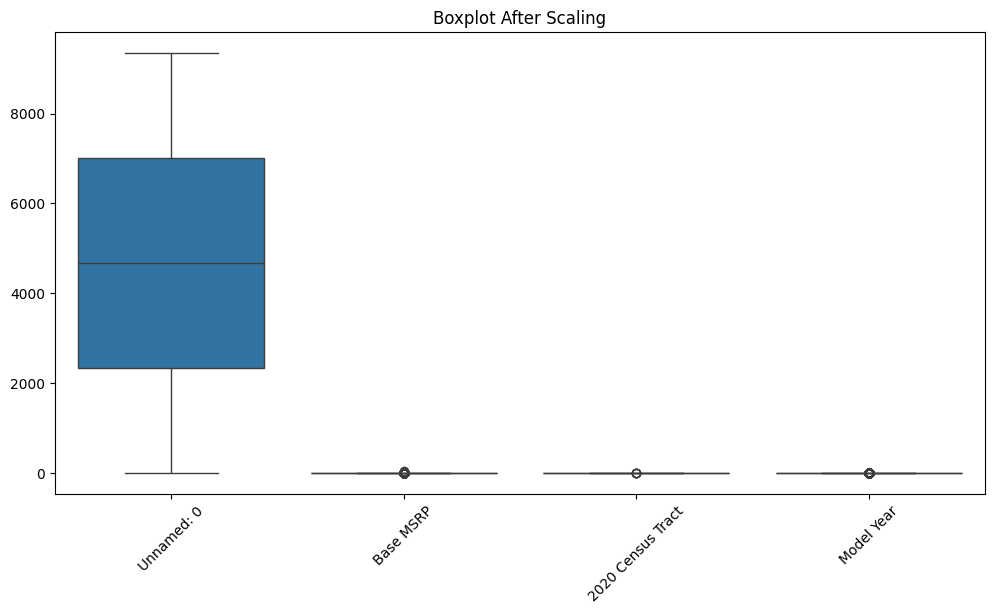

In [9]:
# Plot the boxplot AFTER scaling
plt.figure(figsize=(12, 6))
# Select only the common columns present in both X_train and outlier_features
common_cols = list(set(X_train.columns) & set(outlier_features))
sns.boxplot(data=X_train[common_cols])
plt.title("Boxplot After Scaling")
plt.xticks(rotation=45)
plt.show()

In [10]:
#to check if all of the features are now numeric
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9290 entries, 0 to 9289
Data columns (total 11 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Unnamed: 0                                         9290 non-null   int64  
 1   VIN (1-10)                                         9290 non-null   float64
 2   Model Year                                         9290 non-null   float64
 3   Make                                               9290 non-null   float64
 4   Model                                              9290 non-null   float64
 5   Electric Vehicle Type                              9290 non-null   float64
 6   Clean Alternative Fuel Vehicle (CAFV) Eligibility  9290 non-null   float64
 7   Base MSRP                                          9290 non-null   float64
 8   Vehicle Location                                   9290 non-null   float64
 9   Electric

In [19]:
#feature engineering
#deriving new feature such as cost per mile using base MSRP and Electric Range
import math
def calculate_cost_per_mile(row):
  base_MSRP = row['Base MSRP']
  Electric_Range = row['Electric_Range']
  Cost_per_Mile = base_MSRP / Electric_Range
  return Cost_per_Mile
train["Cost_per_Mile"]=train.apply(calculate_cost_per_mile,axis=1)
X_train["Cost_per_Mile"] = train["Cost_per_Mile"]
X_test["Cost_per_Mile"] = test.apply(calculate_cost_per_mile, axis=1)
X_train["Cost_per_Mile"]

,Cost_per_Mile
0,226.037736
1,0.000000
2,0.000000
3,0.000000
4,0.000000
...,...
9285,0.000000
9286,0.000000
9287,343.548387
9288,343.548387


In [20]:
#feature engineering
#deriving new feature such as Vehicle Age using Model Year
from datetime import datetime

current_year = 2025
train["Vehicle_Age"] = current_year - train["Model Year"]
X_train["Vehicle_Age"] = train["Vehicle_Age"]
test["Vehicle_Age"] = current_year - test["Model Year"]
X_test["Vehicle_Age"] = test["Vehicle_Age"]
X_train["Vehicle_Age"]

,Vehicle_Age
0,13
1,8
2,7
3,10
4,9
...,...
9285,8
9286,9
9287,9
9288,9


In [24]:
# Ensure both have the same columns (and remove potentially problematic ones)
features = train.columns.tolist()  # Get the columns from X_train
features.remove('Electric_Range')   # Remove 'Electric_Range' from features
features.remove('Unnamed: 0')       # Remove 'Unnamed: 0' from features (if present)

# Use the common features for training and prediction
X_train = X_train[features]
X_test = X_test[features]
#model training
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_train_pred = rf_model.predict(X_train)
mae = mean_absolute_error(y_train, y_train_pred)
mse = mean_squared_error(y_train, y_train_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_train, y_train_pred)
rmse

test_predictions = rf_model.predict(X_test)
test_predictions

array([  8.09, 216.27, 216.27,  88.02, 222.  , 114.57, 106.3 ,  28.08,
        28.14,  44.91,  88.77, 229.03,  28.08, 124.62, 124.62,  28.3 ,
       123.89,  65.6 ,  38.91, 124.62,  87.93,  65.6 , 124.62, 114.57,
        44.28,  88.02,  65.6 ,  28.56, 124.62,  28.14, 105.29,  28.3 ,
       192.72,  44.32,  88.02,  28.28, 106.3 , 189.6 ,  28.3 , 124.62,
        28.56, 124.62,  28.14, 114.57,  28.08, 109.98, 114.57,  44.28,
       124.62, 216.27, 107.95, 107.95,  28.14,  44.28,  65.6 ,  88.11,
       135.11,  44.16, 124.62,  28.17,  38.91, 124.62, 114.57, 222.  ,
        44.32,  74.88, 192.72,  28.14,  28.63,  28.08,  88.5 , 237.43,
       125.37, 222.  ,  65.6 ,  28.08,  28.08,  87.  ,  44.28, 264.99,
        44.97, 114.57,   7.72,   7.72,  28.08,  44.32,  44.32,  65.6 ,
       280.24, 123.89,  28.3 , 110.07, 130.45,  28.3 , 114.57,  44.28,
        28.08,  28.28,  28.3 , 124.62, 114.57, 264.99, 114.57,  28.3 ,
       114.57,  28.28, 109.98,   8.  ,  88.02,  28.17, 229.03,  87.93,
      

In [26]:
# Create the directory if it doesn't exist
import os
os.makedirs("/mnt/data", exist_ok=True)

# Create submission file
submission = pd.DataFrame({"Id": range(len(test_predictions)), "Predicted_Rating": test_predictions})
submission.to_csv("/mnt/data/submission.csv", index=False)

print("Submission file created successfully!")

Submission file created successfully!


In [27]:
from google.colab import files
files.download("/mnt/data/submission.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>